In [ ]:
import pandas as pd
import os

In [ ]:
directory_path = '/content/drive/MyDrive/archive (8)'
directory_files = os.listdir(directory_path)

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (8)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/archive (8)/Sales_April_2019.csv
/content/drive/MyDrive/archive (8)/Sales_February_2019.csv
/content/drive/MyDrive/archive (8)/Sales_December_2019.csv
/content/drive/MyDrive/archive (8)/Sales_August_2019.csv
/content/drive/MyDrive/archive (8)/Sales_January_2019.csv
/content/drive/MyDrive/archive (8)/Sales_March_2019.csv
/content/drive/MyDrive/archive (8)/Sales_July_2019.csv
/content/drive/MyDrive/archive (8)/Sales_June_2019.csv
/content/drive/MyDrive/archive (8)/Sales_November_2019.csv
/content/drive/MyDrive/archive (8)/Sales_May_2019.csv
/content/drive/MyDrive/archive (8)/Sales_October_2019.csv
/content/drive/MyDrive/archive (8)/Sales_September_2019.csv


In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/archive (8)')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_November_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [ ]:
dir_path = '/content/drive/MyDrive/archive (8)'

# Create data frame for all data
sales_data = pd.DataFrame()

In [ ]:
# Concatenation of all data in csv
for file in files:
    data = pd.read_csv("/content/drive/MyDrive/archive (8)/" + file)
    sales_data = pd.concat([sales_data, data])
    sales_data.to_csv("sales_data.csv", index=False)

In [ ]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


DATA CLEANING

In [ ]:
##create backup data before cleaning
sales_backup = sales_data.copy()

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
##check null values
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
##remove null values
sales_data_clean = sales_data.dropna(axis=0)

In [ ]:
sales_data_clean.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
sales_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
sales_data_clean.duplicated()

0        False
2        False
3        False
4        False
5        False
         ...  
11681    False
11682    False
11683    False
11684    False
11685    False
Length: 186305, dtype: bool

In [ ]:
sales_data_clean[sales_data_clean.duplicated()==True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11574,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [ ]:
sales_data_clean = sales_data_clean.drop_duplicates()

In [ ]:
sales_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
##rename column name
sales_data_clean = sales_data_clean.rename(columns={'Quantity Ordered': 'Qty',
                                                    'Price Each':'Price', 'Purchase Address': 'Address'})


In [ ]:
sales_data_clean

,Order ID,Product,Qty,Price,Order Date,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
sales_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Order ID    185687 non-null  object
 1   Product     185687 non-null  object
 2   Qty         185687 non-null  object
 3   Price       185687 non-null  object
 4   Order Date  185687 non-null  object
 5   Address     185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
sales_data_clean['Qty'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [ ]:
sales_data_clean = sales_data_clean[sales_data_clean['Qty']!='Quantity Ordered']

In [ ]:
##change data type
sales_data_clean['Qty'] = sales_data_clean['Qty'].astype(int)
sales_data_clean['Price'] = sales_data_clean['Price'].astype(float)
sales_data_clean['Order Date'] = pd.to_datetime(sales_data_clean['Order Date'])

<ipython-input-27-e223fde53a24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean['Qty'] = sales_data_clean['Qty'].astype(int)
<ipython-input-27-e223fde53a24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean['Price'] = sales_data_clean['Price'].astype(float)
<ipython-input-27-e223fde53a24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
sales_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Order ID    185686 non-null  object        
 1   Product     185686 non-null  object        
 2   Qty         185686 non-null  int64         
 3   Price       185686 non-null  float64       
 4   Order Date  185686 non-null  datetime64[ns]
 5   Address     185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


Data Manipulation



In [ ]:
##create column revenue
sales_data_clean['Revenue'] = sales_data_clean['Qty'] * sales_data_clean['Price']
sales_data_clean

<ipython-input-29-2ae652154dd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean['Revenue'] = sales_data_clean['Qty'] * sales_data_clean['Price']


,Order ID,Product,Qty,Price,Order Date,Address,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [ ]:
##separate date (month, year, hour)
sales_data_clean['Month'] = sales_data_clean['Order Date'].dt.month
sales_data_clean['Day'] = sales_data_clean['Order Date'].dt.dayofweek
sales_data_clean['Hour'] = sales_data_clean['Order Date'].dt.hour
sales_data_clean

<ipython-input-30-48ed98ebe989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean['Month'] = sales_data_clean['Order Date'].dt.month
<ipython-input-30-48ed98ebe989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean['Day'] = sales_data_clean['Order Date'].dt.dayofweek
<ipython-input-30-48ed98ebe989>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Order ID,Product,Qty,Price,Order Date,Address,Revenue,Month,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,6,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,1,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,1,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,6,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,0,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,3,17


In [ ]:
##separate city from address column
def city(x):
    return x.split(',')[1]
sales_data_clean['City'] = sales_data_clean['Address'].apply(city)
sales_data_clean

<ipython-input-31-ce5c2f3099e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean['City'] = sales_data_clean['Address'].apply(city)


,Order ID,Product,Qty,Price,Order Date,Address,Revenue,Month,Day,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,4,8,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,6,22,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,4,14,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,4,14,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,1,9,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,1,20,Los Angeles
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,6,16,San Francisco
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,0,7,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,3,17,San Francisco


DATA ANALYSIS

In [ ]:
##total revenue
sales_data_clean['Revenue'].sum().round(2)

34465537.94

In [ ]:
##reveneu each month
sales_data_clean.groupby('Month')['Revenue'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Revenue, dtype: float64

In [ ]:
monthly_revenue = sales_data_clean.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue

,Month,Revenue
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

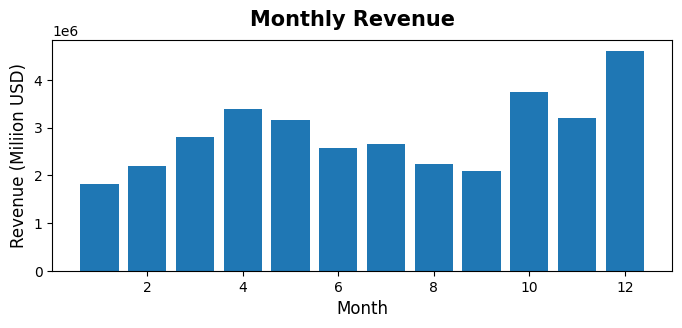

In [ ]:
fig, ax= plt.subplots(figsize = (8, 3))
fig.suptitle('Monthly Revenue', fontsize = 15, fontweight='bold')
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Revenue (Miliion USD)', fontsize = 12)
ax.bar (data= monthly_revenue, x = 'Month', height = 'Revenue')
plt.show

In [ ]:
##revenue each day
sales_data_clean.groupby('Day')['Revenue'].sum()

Day
0    4877588.21
1    5086275.40
2    4986823.36
3    4833763.73
4    4853642.26
5    4900195.58
6    4927249.40
Name: Revenue, dtype: float64

In [ ]:
daily_revenue = sales_data_clean.groupby('Day')['Revenue'].sum().reset_index()
daily_revenue.index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue

,Day,Revenue
Monday,0,4877588.21
Tuesday,1,5086275.40
Wednesday,2,4986823.36
Thursday,3,4833763.73
Friday,4,4853642.26
Saturday,5,4900195.58
Sunday,6,4927249.40


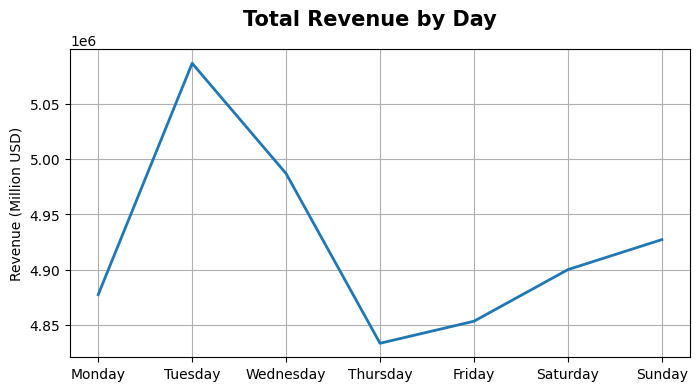

In [ ]:
plt.clf
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(daily_revenue.index, 'Revenue', data = daily_revenue, lw=2)
fig.suptitle('Total Revenue by Day', fontsize = 15, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Revenue (Million USD)')
plt.grid(True)

In [ ]:
##revenue each hour
hourly_revenue = sales_data_clean.groupby('Hour')['Revenue'].sum()
hourly_revenue

Hour
0      713548.66
1      460563.90
2      234839.45
3      145742.94
4      162546.07
5      230664.87
6      447963.01
7      744067.32
8     1192309.20
9     1638784.04
10    1942988.08
11    2296619.84
12    2314359.85
13    2152369.98
14    2082513.70
15    1940623.20
16    1902523.20
17    2126553.97
18    2218374.01
19    2411971.14
20    2280784.36
21    2040790.48
22    1606243.85
23    1177792.82
Name: Revenue, dtype: float64

<ipython-input-38-b170dcd71c9c>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in sales_data_clean.groupby(['Hour'])]


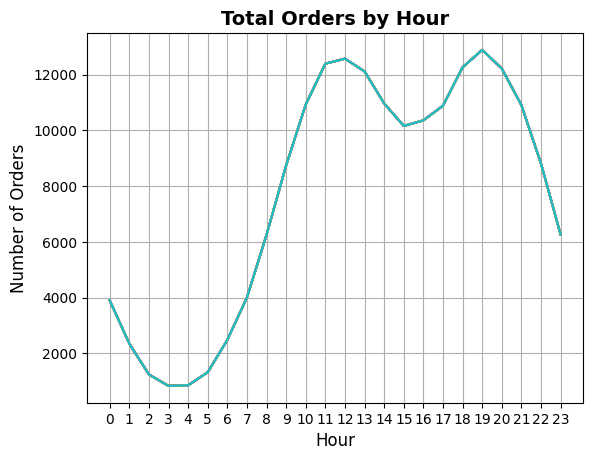

In [ ]:
##orders by hour
keys = [pair for pair, df in sales_data_clean.groupby(['Hour'])]

plt.plot(keys, sales_data_clean.groupby(['Hour']).count())
plt.xticks(keys)
plt.title("Total Orders by Hour", fontsize = 14, weight='bold')
plt.xlabel("Hour",fontsize = 12)
plt.ylabel( "Number of Orders",
    fontsize=12
)
plt.grid()
plt.show()

In [ ]:
import matplotlib.dates as mdates

In [ ]:
##revenue by city
sales_data_clean.groupby('City')['Revenue'].sum()

City
 Atlanta          2794199.07
 Austin           1818044.33
 Boston           3658627.65
 Dallas           2765373.96
 Los Angeles      5448304.28
 New York City    4661867.14
 Portland         2319331.94
 San Francisco    8254743.55
 Seattle          2745046.02
Name: Revenue, dtype: float64

In [ ]:
city_revenue = sales_data_clean.groupby('City')['Revenue'].sum()
city_revenue = city_revenue.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

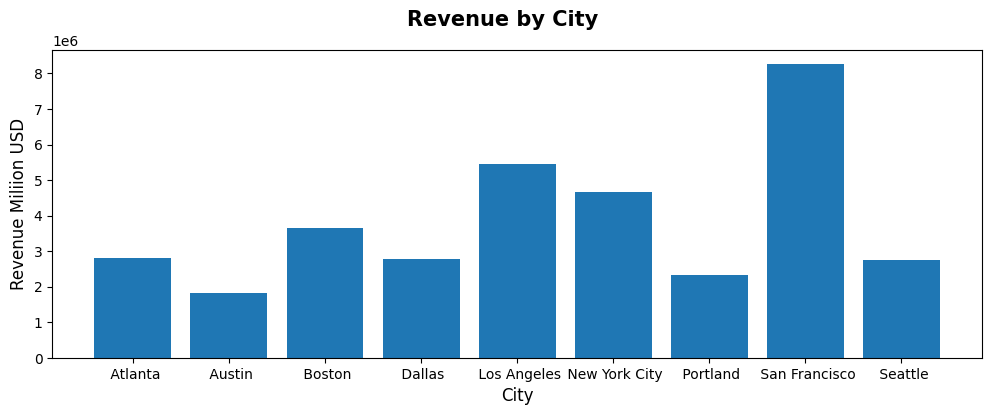

In [ ]:
fig, ax= plt.subplots(figsize = (12, 4))
fig.suptitle('Revenue by City', fontsize = 15, fontweight='bold')
ax.set_xlabel('City', fontsize = 12)
ax.set_ylabel('Revenue Miliion USD', fontsize = 12)
ax.bar (data= city_revenue, x = 'City', height = 'Revenue')
plt.show

In [ ]:
##Sales Product
product_group = sales_data_clean.groupby('Product')
quantity_ordered = product_group.sum()['Qty']
quantity_ordered

<ipython-input-58-13fc0f918597>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Qty']


Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Qty, dtype: int64

<Figure size 640x480 with 0 Axes>

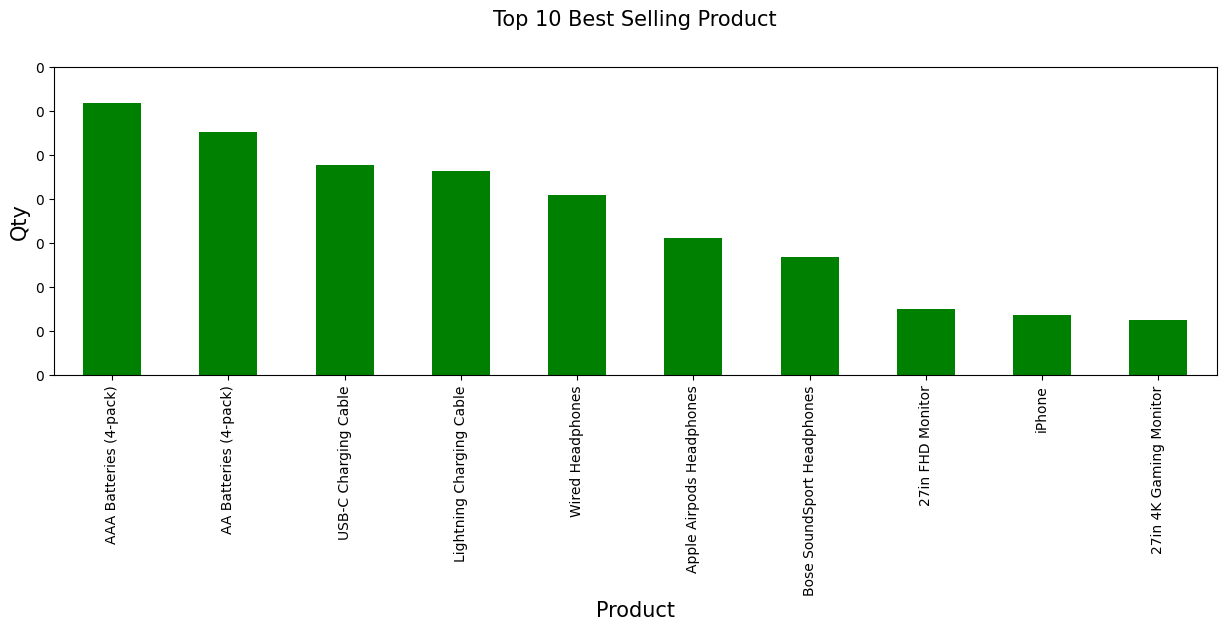

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize = (15,4))
sales_data_clean.groupby('Product')['Qty'].sum().sort_values(ascending=False)[:10].plot(kind='bar', color='green')
plt.title('Top 10 Best Selling Product', loc='center', pad=30, fontsize=15)
plt.xlabel('Product', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=90)
plt.show()

<ipython-input-56-eefd1e517297>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Qty']


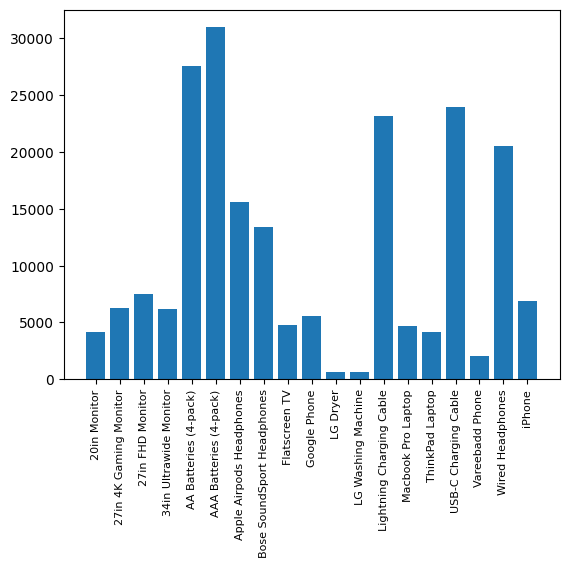

In [ ]:
product_group = sales_data_clean.groupby('Product')
quantity_ordered = product_group.sum()['Qty']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
keys = [city for city, df in sales_data_clean.groupby(['City'])]

<ipython-input-60-16cc4b9db347>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in sales_data_clean.groupby(['City'])]


In [ ]:
product_group = sales_data_clean.groupby('Product')
quantity_ordered = product_group.sum()['Qty']

keys = [pair for pair, df in product_group]

<ipython-input-61-809250d7d805>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Qty']


<ipython-input-62-6bea52b825a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = sales_data_clean.groupby('Product').mean()['Price']
<ipython-input-62-6bea52b825a1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation= 'vertical', size=8)


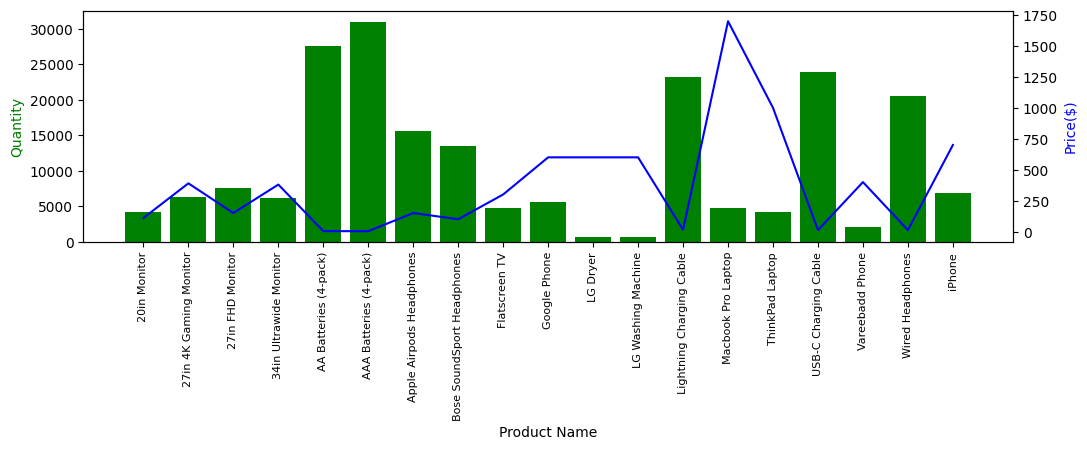

In [ ]:
prices = sales_data_clean.groupby('Product').mean()['Price']
fig, ax1 = plt.subplots(figsize=(12,3))

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(keys, rotation= 'vertical', size=8)

fig.show()

In [ ]:
sales_data_clean.to_csv('Sales_Clean.csv')

In [ ]:
from google.colab import files
files.download('Sales_Clean.csv')